## Observations and Insights 

In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata,study_results, on = 'Mouse ID')
# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
no_mice = len(mouse_df['Mouse ID'].unique())
no_mice


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = mouse_df.copy()
duplicate = duplicate_mice.duplicated()
duplicate_mice['duplicate'] = duplicate
duplicate_mice = duplicate_mice[duplicate_mice['duplicate']==1]
duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicate
909,g989,Propriva,Female,21,26,0,45.0,0,True


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 



In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df = mouse_df.rename(columns = {'Mouse ID':'Mouse_ID'})
mouse_df = mouse_df[mouse_df['Mouse_ID'] != 'g989']


In [7]:
# Checking the number of mice in the clean DataFrame.
nod_mice = len(mouse_df['Mouse_ID'].unique())
nod_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
mouse_gb = mouse_df.groupby('Drug Regimen')
mouse_mean = mouse_gb.mean()
mouse_median = mouse_gb.median()
mouse_stdev = mouse_gb.std()
mouse_sem = mouse_gb.sem()

mouse_summary = pd.DataFrame({'mean': mouse_mean['Tumor Volume (mm3)'],
                             'median': mouse_median['Tumor Volume (mm3)'],
                             'stdev': mouse_stdev['Tumor Volume (mm3)'],
                              'SEM': mouse_sem['Tumor Volume (mm3)']
                             
                             
                             
                             })
mouse_summary
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,mean,median,stdev,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggs = mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([st.tmean, np.median, st.tstd, st.tsem])
aggs


,tmean,median,tstd,tsem
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

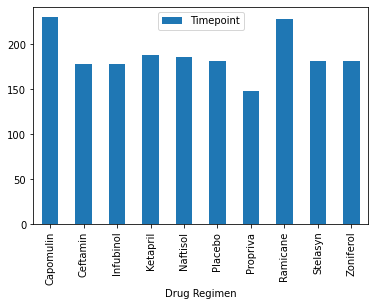

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoints = mouse_df.groupby(['Drug Regimen']).count()['Timepoint']
timepoints_df = pd.DataFrame(timepoints)
timepoints_df.plot.bar()


Text(0.5, 0, 'Drug')

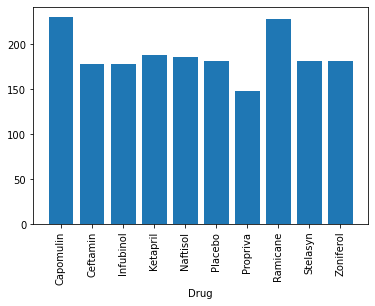

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = list(timepoints.index.values)
y_axis = timepoints.values

plt.bar(x_axis, y_axis)
plt.xticks(rotation = 'vertical')
plt.xlabel('Drug')

,Count
Male,958
Female,922


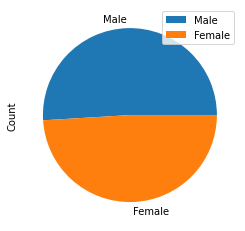

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

males = mouse_df[mouse_df['Sex'] == 'Male']['Mouse_ID'].count()
females = mouse_df[mouse_df['Sex'] == 'Female']['Mouse_ID'].count()
males
females

sex_df = pd.DataFrame({'Count': [males,females]},index = ['Male', 'Female'])


sex_df.plot.pie(y= 'Count')
sex_df

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_time = mouse_df.groupby(["Mouse_ID"])['Timepoint'].max()
greatest_time

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
greatest_df = pd.merge(greatest_time, mouse_df, on=("Mouse_ID","Timepoint"),how="left")
greatest_df

,Mouse_ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for x in treatments:
    volume = greatest_df.loc[greatest_df['Drug Regimen'] == x]['Tumor Volume (mm3)']  
    tumor_vol.append(volume)
    

    iqr = volume.quantile(.75) - volume.quantile(.25)
    
    outliers = volume.loc[(volume > volume.quantile(.75) + 1.5*iqr) | (volume < volume.quantile(.25) - 1.5*iqr)]
    print(f" {x} outliers: {outliers}")
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

 Capomulin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
 Ramicane outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
 Infubinol outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
 Ceftamin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


/var/folders/vk/7qz1cjy94y984qkgdp8bf0880000gn/T/ipykernel_4179/1782758846.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(treatments)


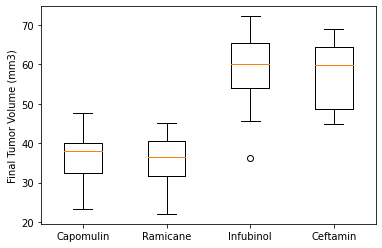

In [59]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()

ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(treatments)

ax1.boxplot(tumor_vol)
plt.show()

## Line and Scatter Plots

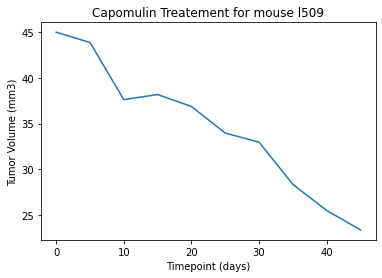

In [53]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
s185_timeseries = mouse_df.loc[mouse_df["Mouse_ID"] == "s185",:]
x = s185_timeseries['Timepoint']
y = s185_timeseries['Tumor Volume (mm3)']

plt.plot(x, y)
plt.title("Capomulin Treatement for mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

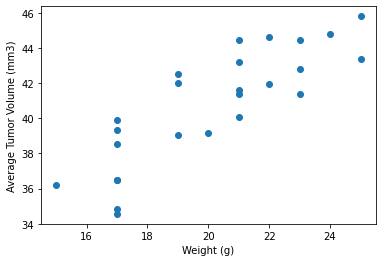

In [60]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

cap_scatter = mouse_df[mouse_df['Drug Regimen'] == 'Capomulin'].groupby(['Mouse_ID']).mean()

fig1, ax1 = plt.subplots()
plt.scatter(cap_scatter['Weight (g)'],cap_scatter['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

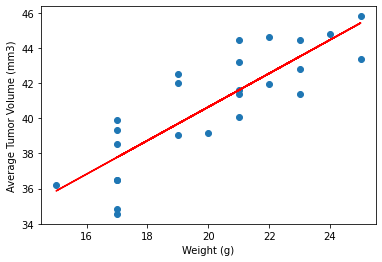

β0= 21.552160532685008
β1= 0.9544396890241049
r= 0.8419363424694721


In [66]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


(slope, intercept,rvalue, pvalue, stderr) = linregress(cap_scatter['Weight (g)'],cap_scatter['Tumor Volume (mm3)'])
outputs = cap_scatter['Weight (g)']* slope + intercept

plt.scatter(cap_scatter['Weight (g)'],cap_scatter['Tumor Volume (mm3)'])
plt.plot(cap_scatter['Weight (g)'], outputs, color='red')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

print (f"β0= {intercept}")
print (f"β1= {slope}")
print (f"r= {rvalue}")


